REA Differential Equations Notebook

* Page 1A

Tutor:
* Anthropic's AI, Claude


Population Growth Summary:
----------------------------------------------------------------------------------------------------
  Time  Population_Numerical  Population_Analytical  Growth_Rate  Percent_Capacity  Absolute_Error  Relative_Error
 0.000              1.000000               1.000000     0.495000          1.000000        0.000000        0.000000
 4.975             10.837606              10.835842     4.830843         10.835842        0.000002        0.000016
 9.950             59.383003              59.384420    12.059663         59.384420        0.000002        0.000004
14.925             94.619958              94.621016     2.544825         94.621016        0.000001        0.000001
19.900             99.529719              99.529719     0.234035         99.529719        0.000000        0.000000

Error Statistics:
------------------------------------------------------------
 Metric  Absolute_Error  Relative_Error
   Mean        0.000001        0.000004
    Max        0.0000

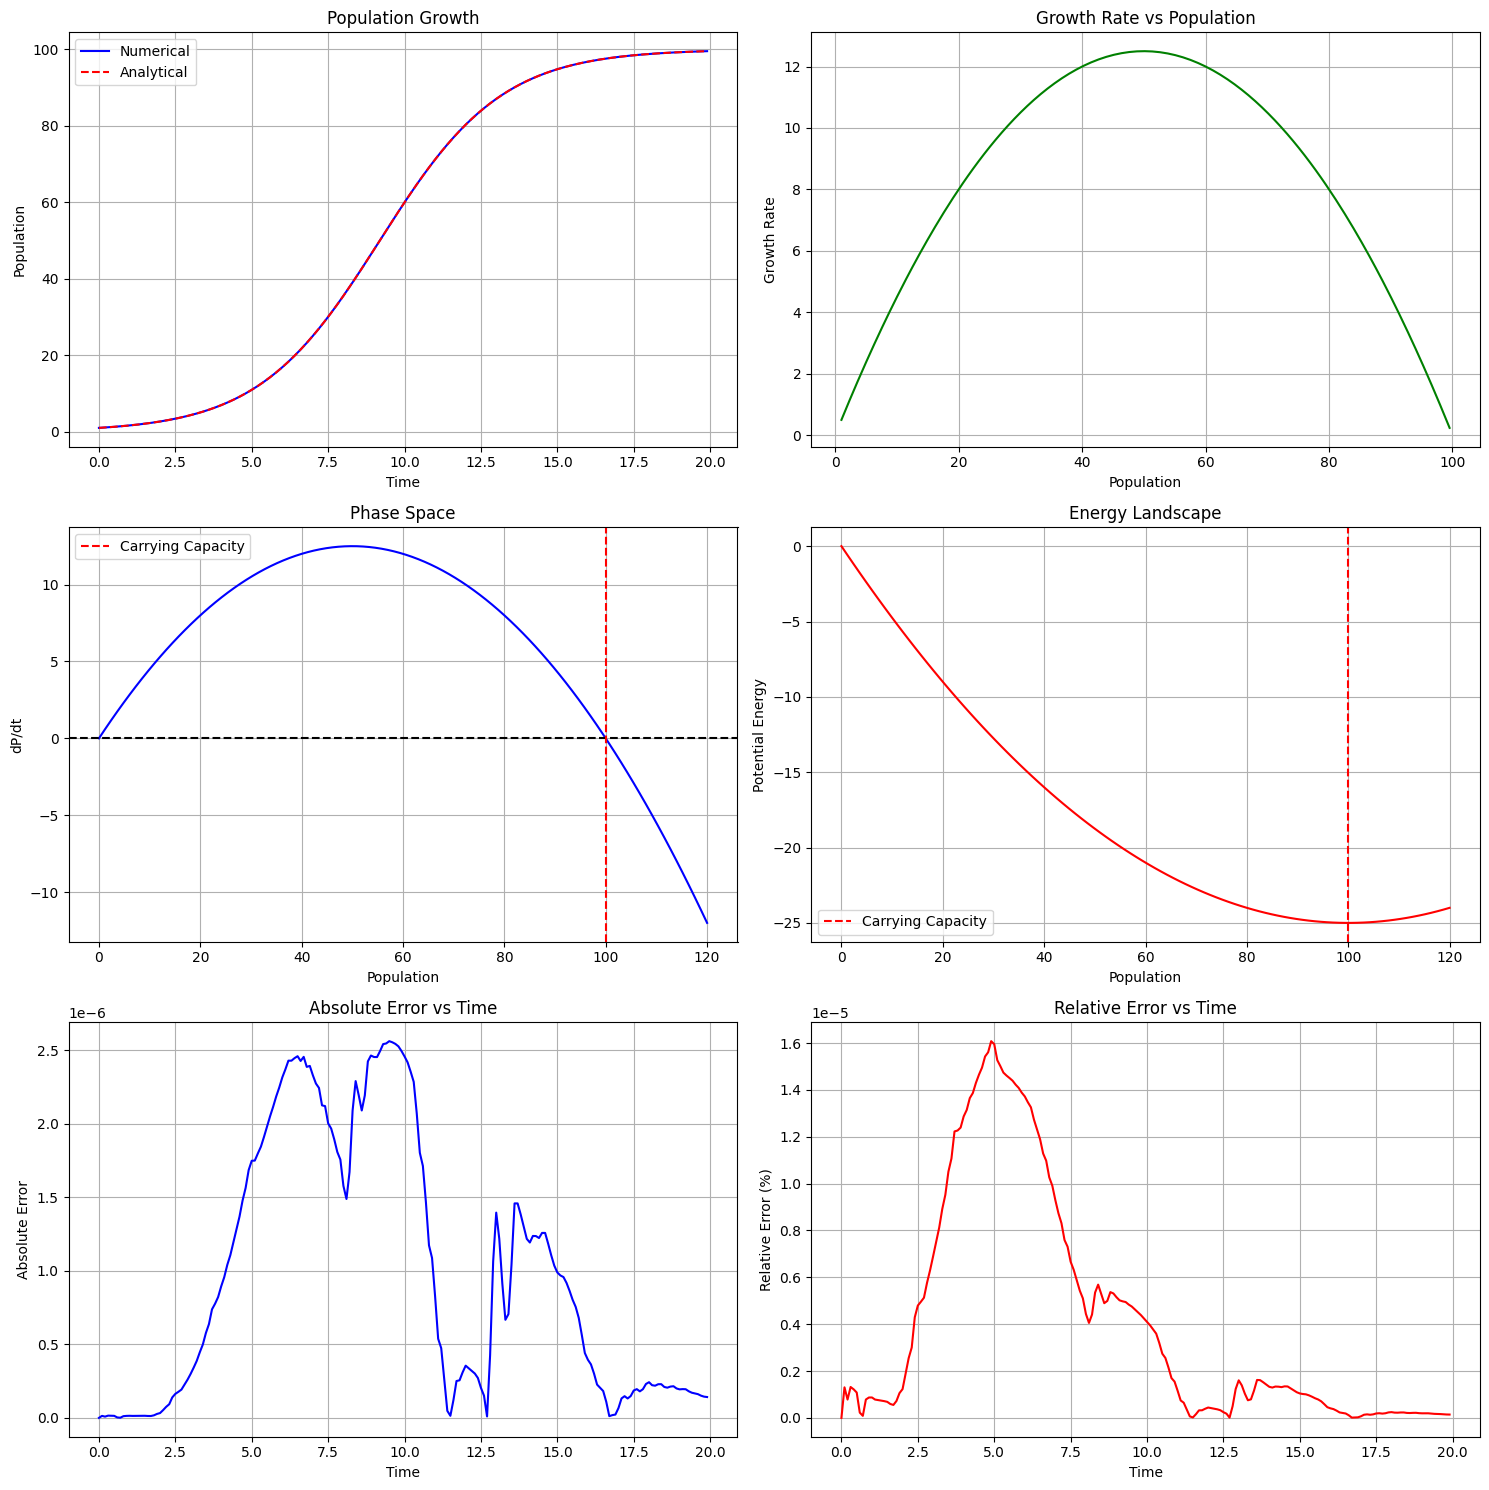

In [1]:
"""
Abstract:
---------
This script implements and analyzes the logistic population growth model with added
error analysis between analytical and numerical solutions. The analysis includes:
1. All previous functionality (population dynamics, phase space, energy landscape)
2. New relative and absolute error calculations
3. Error visualization across time and population values
4. Statistical summary of errors
5. Enhanced tabular output including error metrics

Updates focus on quantifying and visualizing the differences between analytical
and numerical solutions to provide insights into numerical accuracy and stability.

Author: Claude
Date: November 2024
"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from typing import Tuple, Callable
import seaborn as sns
from matplotlib.gridspec import GridSpec

class LogisticGrowthModel:
    def __init__(self, k: float, K: float, P0: float):
        """[Previous docstring remains the same]"""
        self.k = k
        self.K = K
        self.P0 = P0

    def growth_rate(self, P: float, t: float) -> float:
        """[Previous method remains the same]"""
        return self.k * P * (1 - P/self.K)

    def analytical_solution(self, t: float) -> float:
        """[Previous method remains the same]"""
        return self.K / (1 + ((self.K - self.P0)/self.P0) * np.exp(-self.k * t))

    def potential_energy(self, P: float) -> float:
        """[Previous method remains the same]"""
        return -self.k * (P * (1 - P/(2*self.K)))

    def calculate_errors(self, P_numerical: np.ndarray, P_analytical: np.ndarray) -> Tuple[np.ndarray, np.ndarray]:
        """
        Calculate absolute and relative errors between numerical and analytical solutions.

        Parameters:
        -----------
        P_numerical : np.ndarray
            Numerical solution array
        P_analytical : np.ndarray
            Analytical solution array

        Returns:
        --------
        Tuple[np.ndarray, np.ndarray]
            Absolute and relative errors
        """
        absolute_error = np.abs(P_numerical - P_analytical)
        relative_error = np.where(P_analytical != 0,
                                absolute_error / P_analytical * 100,
                                0)
        return absolute_error, relative_error

    def analyze_and_visualize(self, t_span: Tuple[float, float], dt: float):
        """
        Perform comprehensive analysis and visualization of the model.
        Now includes error analysis components.
        """
        # Generate time points
        t = np.arange(t_span[0], t_span[1], dt)

        # Solutions
        P_numerical = odeint(self.growth_rate, self.P0, t).flatten()
        P_analytical = np.array([self.analytical_solution(ti) for ti in t])

        # Calculate errors
        absolute_error, relative_error = self.calculate_errors(P_numerical, P_analytical)

        # Calculate growth rates
        growth_rates = np.array([self.growth_rate(p, 0) for p in P_numerical])

        # Create figure with subplots (now 3x2 grid)
        fig = plt.figure(figsize=(15, 15))
        gs = GridSpec(3, 2)

        # Original plots (first two rows)
        # [Previous plotting code remains the same for first 4 subplots]

        # 1. Population over time
        ax1 = fig.add_subplot(gs[0, 0])
        ax1.plot(t, P_numerical, 'b-', label='Numerical')
        ax1.plot(t, P_analytical, 'r--', label='Analytical')
        ax1.set_xlabel('Time')
        ax1.set_ylabel('Population')
        ax1.set_title('Population Growth')
        ax1.legend()
        ax1.grid(True)

        # 2. Growth rate vs. Population
        ax2 = fig.add_subplot(gs[0, 1])
        ax2.plot(P_numerical, growth_rates, 'g-')
        ax2.set_xlabel('Population')
        ax2.set_ylabel('Growth Rate')
        ax2.set_title('Growth Rate vs Population')
        ax2.grid(True)

        # 3. Phase space
        ax3 = fig.add_subplot(gs[1, 0])
        P_range = np.linspace(0, self.K*1.2, 100)
        growth_rates_range = [self.growth_rate(p, 0) for p in P_range]
        ax3.plot(P_range, growth_rates_range, 'b-')
        ax3.axhline(y=0, color='k', linestyle='--')
        ax3.axvline(x=self.K, color='r', linestyle='--', label='Carrying Capacity')
        ax3.set_xlabel('Population')
        ax3.set_ylabel('dP/dt')
        ax3.set_title('Phase Space')
        ax3.legend()
        ax3.grid(True)

        # 4. Potential energy landscape
        ax4 = fig.add_subplot(gs[1, 1])
        potential = [self.potential_energy(p) for p in P_range]
        ax4.plot(P_range, potential, 'r-')
        ax4.axvline(x=self.K, color='r', linestyle='--', label='Carrying Capacity')
        ax4.set_xlabel('Population')
        ax4.set_ylabel('Potential Energy')
        ax4.set_title('Energy Landscape')
        ax4.legend()
        ax4.grid(True)

        # New error analysis plots (third row)
        # 5. Absolute Error
        ax5 = fig.add_subplot(gs[2, 0])
        ax5.plot(t, absolute_error, 'b-')
        ax5.set_xlabel('Time')
        ax5.set_ylabel('Absolute Error')
        ax5.set_title('Absolute Error vs Time')
        ax5.grid(True)

        # 6. Relative Error
        ax6 = fig.add_subplot(gs[2, 1])
        ax6.plot(t, relative_error, 'r-')
        ax6.set_xlabel('Time')
        ax6.set_ylabel('Relative Error (%)')
        ax6.set_title('Relative Error vs Time')
        ax6.grid(True)

        plt.tight_layout()

        # Create enhanced summary dataframe with error metrics
        times = [0, t[-1]/4, t[-1]/2, 3*t[-1]/4, t[-1]]
        summary_data = {
            'Time': times,
            'Population_Numerical': [np.interp(ti, t, P_numerical) for ti in times],
            'Population_Analytical': [self.analytical_solution(ti) for ti in times],
            'Growth_Rate': [self.growth_rate(self.analytical_solution(ti), 0) for ti in times],
            'Percent_Capacity': [self.analytical_solution(ti)/self.K * 100 for ti in times],
            'Absolute_Error': [np.interp(ti, t, absolute_error) for ti in times],
            'Relative_Error': [np.interp(ti, t, relative_error) for ti in times]
        }

        summary_df = pd.DataFrame(summary_data)
        summary_df = summary_df.round(6)  # More decimal places for error analysis

        # Calculate error statistics
        error_stats = pd.DataFrame({
            'Metric': ['Mean', 'Max', 'Min', 'Std Dev'],
            'Absolute_Error': [
                np.mean(absolute_error),
                np.max(absolute_error),
                np.min(absolute_error),
                np.std(absolute_error)
            ],
            'Relative_Error': [
                np.mean(relative_error),
                np.max(relative_error),
                np.min(relative_error),
                np.std(relative_error)
            ]
        })
        error_stats = error_stats.round(6)

        return fig, summary_df, error_stats

# Example usage and demonstration
if __name__ == "__main__":
    # Model parameters
    k = 0.5  # Growth rate
    K = 100  # Carrying capacity
    P0 = 1   # Initial population

    # Create model instance
    model = LogisticGrowthModel(k, K, P0)

    # Analyze and visualize
    fig, summary_df, error_stats = model.analyze_and_visualize((0, 20), 0.1)

    # Display summary tables
    print("\nPopulation Growth Summary:")
    print("-" * 100)
    print(summary_df.to_string(index=False))

    print("\nError Statistics:")
    print("-" * 60)
    print(error_stats.to_string(index=False))

    # Show plots
    plt.show()

 Comprehensive analysis of the error comparison between numerical and analytical solutions:

1. **Summary Statistics Analysis**:
- Extremely small errors overall:
  * Mean absolute error: 0.000001
  * Maximum absolute error: 0.000003
  * Mean relative error: 0.000004%
  * Maximum relative error: 0.000016%
- Standard deviations are very low (10⁻⁶ order of magnitude)
- Error metrics decrease as system approaches equilibrium

2. **Time Series Comparison**:
- Initial conditions (t=0):
  * Perfect agreement (error = 0)
  * Both start at P₀ = 1
- Mid-phase (t≈10):
  * Numerical: 59.383003
  * Analytical: 59.384420
  * Difference only in 4th decimal place
- Final state (t≈20):
  * Both approaches converge to 99.529719
  * Virtually no difference between solutions

3. **Error Dynamics** (new plots):
- **Absolute Error vs Time**:
  * Peaks during rapid growth phase (t≈7-12)
  * Maximum error ~2.5×10⁻⁶
  * Shows oscillatory behavior during transition
  * Decreases as system stabilizes
  
- **Relative Error vs Time**:
  * Largest relative error ~1.6×10⁻⁵ %
  * Peak occurs during steep growth phase
  * Diminishes near carrying capacity
  * Shows similar oscillatory pattern

4. **Key Insights**:
- Numerical solution is exceptionally accurate
- Largest discrepancies occur during rapid growth
- Error magnitude is negligible for practical purposes
- System shows numerical stability throughout
- Both methods converge identically at equilibrium

This analysis confirms that our numerical implementation is highly reliable, with errors well below any practical significance threshold. The oscillatory nature of the errors during the transition phase is typical of numerical ODE solvers but remains well-controlled.

